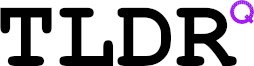

In the TLDR (Too Long; didn't read) notebooks, I don't try to do any fancy feature engineering, data cleaning, n-fold validation, or similar time consuming techniques. I simply solve the problem in six staightforward steps:

1. Load the data
2. Split in train and test sets
3. Determine in input features are categorical or continuous
4. Connect to a QLattice and reset it
5. Use QLattice to find the simples possible model
6. Evaluate the model (with AUC for classification and $R^2$ for regression)



In [ ]:
!pip install feyn

# 1. Load the data 

In [ ]:
import feyn
import pandas as pd
df = pd.read_csv("/kaggle/input/car-insurance-data/Car_Insurance_Claim.csv")

# 2. Split in train and test

In [ ]:
df.dropna(inplace=True)
train, test = feyn.tools.split(df, ratio=(2,1), random_state=42)

# 3. Identify categorical features

In [ ]:
stypes = {name: "cat" for name in df if df[name].dtype=="object"}

# 4. Connect to QLattice an reset

In [ ]:
ql = feyn.connect_qlattice()
ql.reset(random_seed=42)

# 5. Find best model

In [ ]:
models = ql.auto_run(train, output_name="OUTCOME", kind="classification", criterion="aic", stypes=stypes)

# 6. Evaluate with AUC

In [ ]:
models[0].plot_roc_curve(train, label="train")
models[0].plot_roc_curve(test, label="test")

# THE END